In [1]:
"""필요 라이브러리들 호출"""

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns # 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

import os
print(os.listdir("/users/eunnyoung/work/kaggle/bike_sharing_demand/data"))

['sampleSubmission.csv', 'test.csv', 'train.csv']


## 1. 훈련, 테스트 데이터셋의 형태 및 컬럼의 속성 데이터 값 파악

In [2]:
# 훈련데이터와 테스트 데이터셋 불러오기
train = pd.read_csv('/users/eunnyoung/work/kaggle/bike_sharing_demand/data/train.csv')
test = pd.read_csv('/users/eunnyoung/work/kaggle/bike_sharing_demand/data/test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# 데이터셋 내에 있는 컬럼 속성들에 대한 설명

"""
datetime - hourly date + timestamp
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy
          2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
          3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
          4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
"""

# 훈련 데이터셋의 각 컬럼별 데이터 타입 및 값의 개수 파악
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## 2. 데이터 전처리 및 시각화

In [6]:
# datetime 속성을 분리하여 추출 속성으로 활용하기 위해 split 함수 사용

train['tempDate'] = train.datetime.apply(lambda x:x.split())

In [7]:
# 분리한 tempDate를 가지고 년-월-일을 이용하여 year, month, day 그리고 weekday column을 추출
# split() [문자형 자료형_ 문자열 나누기] <=> join() [문자형 자료형_ 문자열 삽입]

train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])

# weekday는 calendar패키지와 datetime패키지를 활용한다.
# calendar.day_name 사용법: https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int
# datetime.strptime 문서: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
# 파이썬에서 날짜와 시간 다루기: https://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/ 

train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0], "%Y-%m-%d").weekday()])

train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])

In [8]:
# 분리를 통해 추출된 속성은 문자열 속성을 가지고 있으므로 숫자형 데이터로 변환
# pandas.to_numeric(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html

train['year'] = pd.to_numeric(train.year,errors='coerce')
train['month'] = pd.to_numeric(train.month,errors='coerce')
train['day'] = pd.to_numeric(train.day,errors='coerce')
train['hour'] = pd.to_numeric(train.hour, errors='coerce')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
tempDate      10886 non-null object
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
weekday       10886 non-null object
hour          10886 non-null int64
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [10]:
# 필요를 다한 tempDate column을 drop함
train = train.drop('tempDate', axis=1)

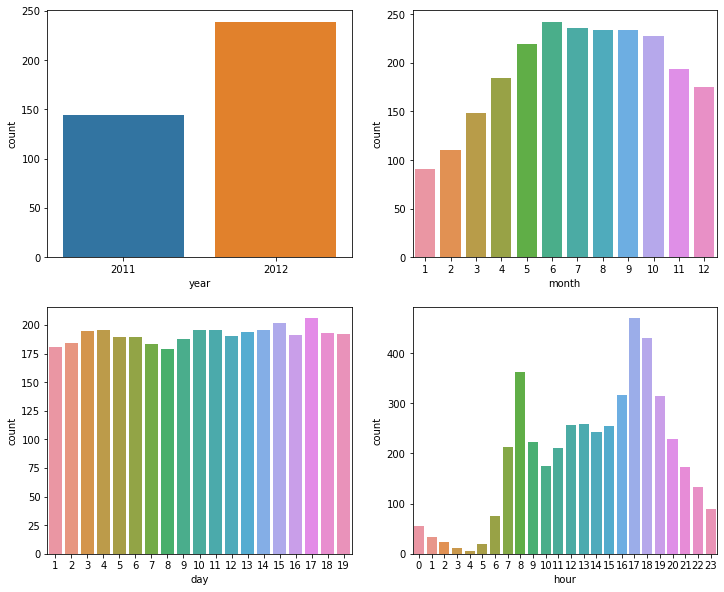

In [11]:
# 각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악

# 년도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year', y='count', data=train.groupby('year')['count'].mean().reset_index())

# month와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index())

# day와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day', y='count', data=train.groupby('day')['count'].mean().reset_index())

# hour와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour', y='count', data=train.groupby('hour')['count'].mean().reset_index())

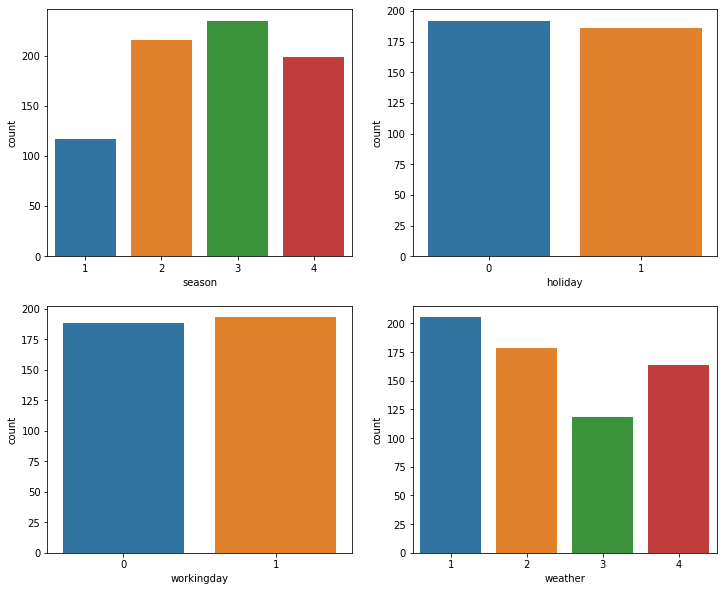

In [12]:
# 계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season', y='count', data=train.groupby('season')['count'].mean().reset_index())

# 휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday', y='count', data=train.groupby('holiday')['count'].mean().reset_index())

# 작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday', y='count', data=train.groupby('workingday')['count'].mean().reset_index())

# 날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather', y='count', data=train.groupby('weather')['count'].mean().reset_index())

In [13]:
"""
해당 부분은 처음 import한 데이터셋의 season column을 수정하고자 하여 추가함.
"""

def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3
    
train['season'] = train.month.apply(badToRight)

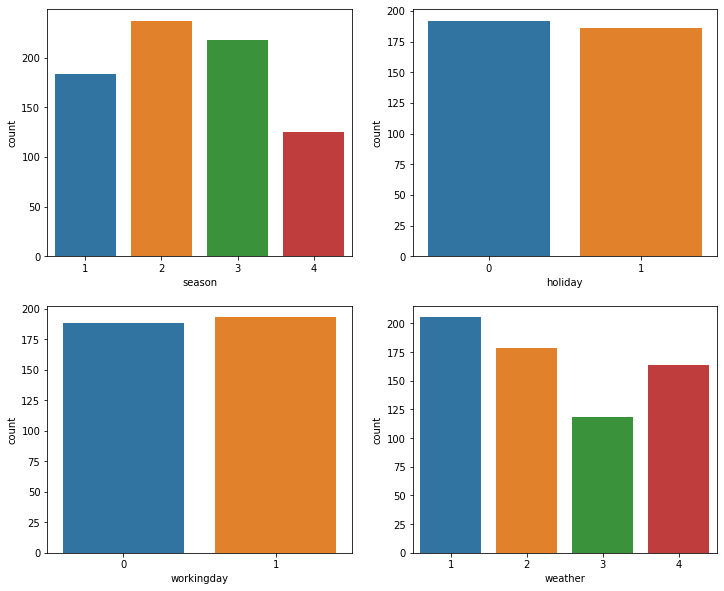

In [17]:
# 위의 시각화와 같이 하나의 컬럼과 결과 값을 비교

# 계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season', y='count', data=train.groupby('season')['count'].mean().reset_index())

# 휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday', y='count', data=train.groupby('holiday')['count'].mean().reset_index())

# 작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday', y='count', data=train.groupby('workingday')['count'].mean().reset_index())

# 날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather', y='count', data=train.groupby('weather')['count'].mean().reset_index())

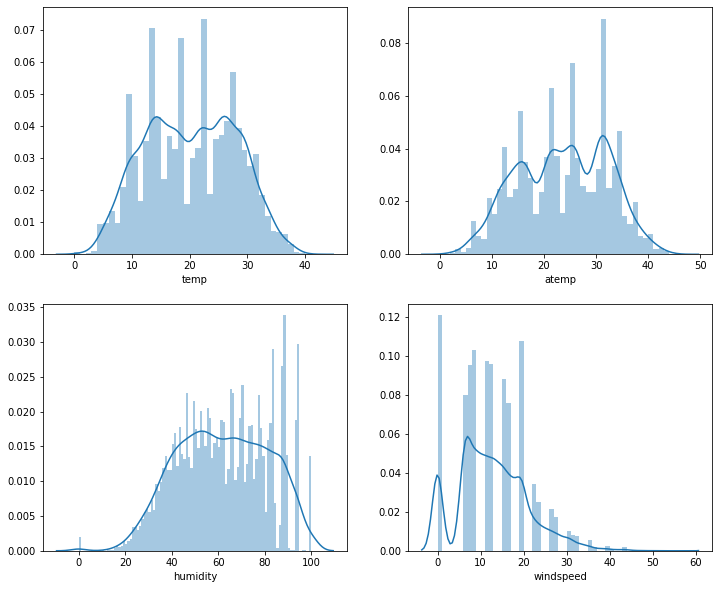

In [19]:
# 그리고 남은 분포를 통해 표현하였을 때 좋은 컬럼들을 count와 비교 ★

# 온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train.temp, bins=range(train.temp.min().astype('int'), train.temp.max().astype('int')+1))

# 평균온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train.atemp, bins=range(train.atemp.min().astype('int'), train.atemp.max().astype('int')+1))

# 습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(train.humidity, bins=range(train.humidity.min().astype('int'), train.humidity.max().astype('int')+1))

# 바람속도와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train.windspeed, bins=range(train.windspeed.min().astype('int'), train.windspeed.max().astype('int')+1))

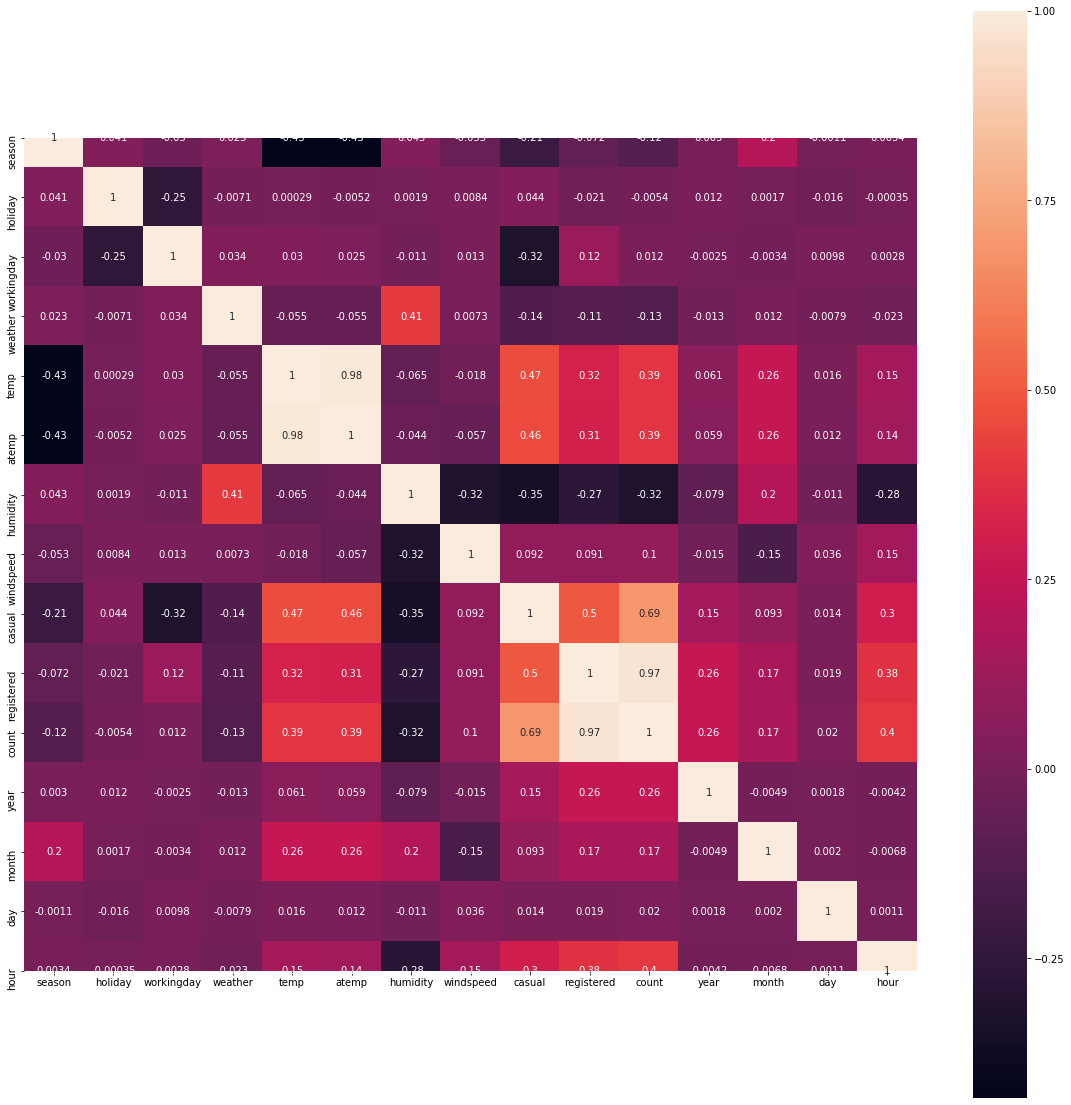

In [21]:
# 각각의 컬럼들 간의 상관계수를 heatmap을 통해 시각화

fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(), annot=True, square=True)

ValueError: 'c' argument has 24 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

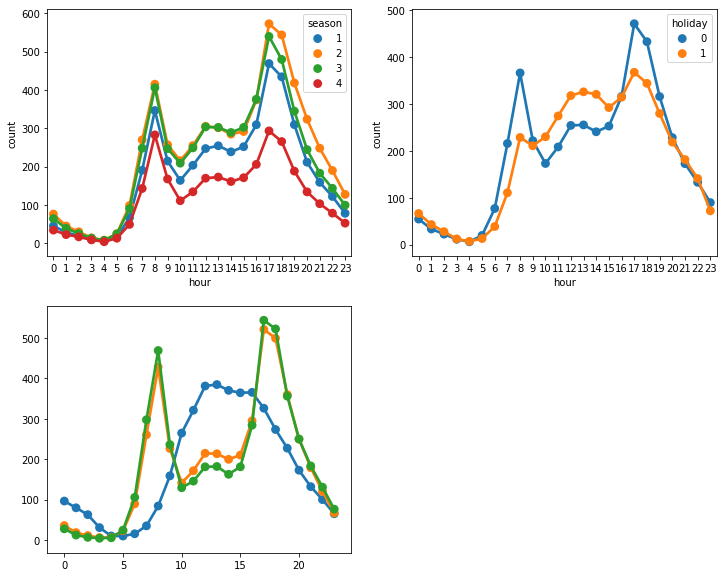

In [23]:
# heatmap 상관관계를 참조하여 이전의 시각화와는 달리 두 개의 서로 다른 컬럼이 적용된 count를 시각화

# 시간과 계절에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour', y='count', hue='season', data=train.groupby(['season', 'hour'])['count'].mean().reset_index())

# 시간과 휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour', y='count', hue='holiday', data=train.groupby(['holiday', 'hour'])['count'].mean().reset_index())

# 시간과 휴일 여부에 따른 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour', y='count', hue='weekday', hue_order=['Sunday', 'Monday', 'Tuesday', 'Wendnesday', 'Thursday', 'Friday', 'Saturday'], \
                    data=train.groupby(['weekday', 'hour'])['count'].mean().reset_index())

# 시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour', y='count', hue='weather', data=train.groupby(['weather', 'hour'])['count'].mean().reset_index())

In [24]:
# 마지막 시각화에 이상치가 있는 것 같아서 확인

train[train.weather==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,Monday,18


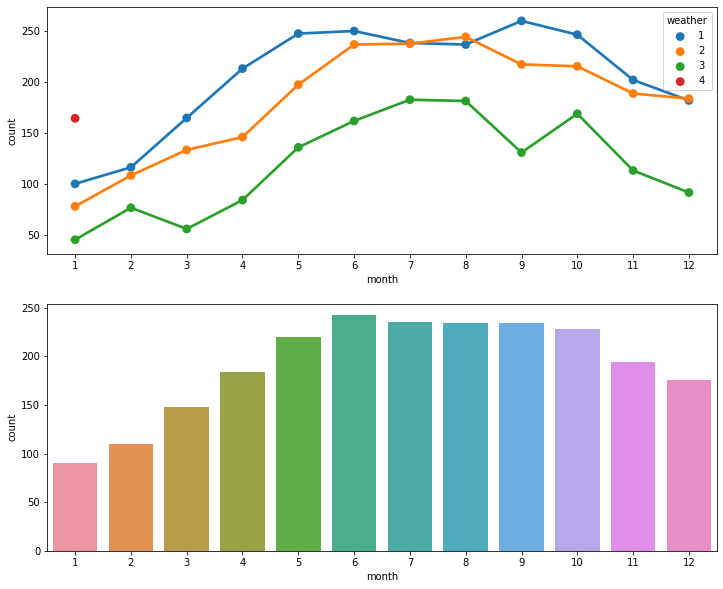

In [26]:
# 달과 날씨에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month', y='count', hue='weather', data=train.groupby(['weather', 'month'])['count'].mean().reset_index())

# 달별 count
ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index())

이후 머신러닝의 내용은 추후에 다시 따라해볼 것 ★

The code I used above is from here. https://www.kaggle.com/kwonyoung234/for-beginner/data